In [145]:
import pandas as pd
import matplotlib.pyplot as plt
import time
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
data = pd.read_csv("https://raw.githubusercontent.com/AIP-BITS/BITS-DATA/main/cancer.csv")

Team:
1. Ananya Gautam - 2020AAPS2096H
2. Shubhankar Vivek Shastri - 2020A7PS2054H
3. Saksham Singhal - 2020A8PS2143H

## Basic Analysis

In [146]:
data.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


1. The data is more or less noramlly distributed because 50% of the rows lie below the approximate mean value in each feature.
2. All of the rows have non-null features.
3. Deviation of some features is same (they might have high correlation). 
4. 30 featres and a target value.

In [147]:
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


1. The data is not sorted

In [148]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

# Visualisation

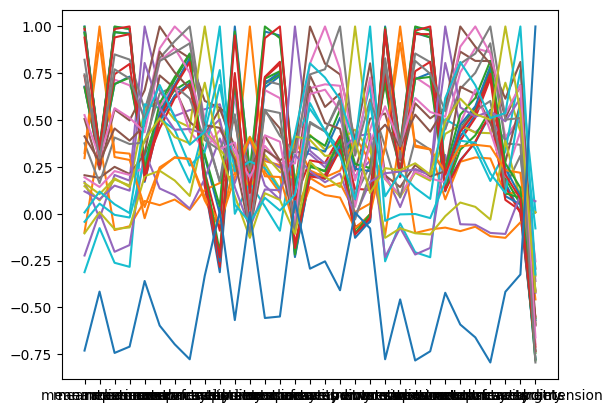

In [149]:
corr_mat = data.corr()
plt.plot(corr_mat)

High correlation is observed in many features

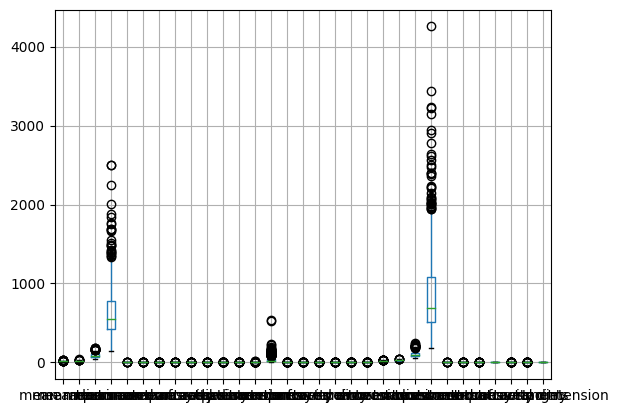

In [150]:
data.boxplot()
plt.show()

Specific features have outliers so enitre rows can be removed
feature-4, feature-14 and feature-24 have outliers

## Outlier Removal

In [151]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
scaler.fit(data)

data_scaler_transform = scaler.transform(data)
data_scaler_transform.shape

(569, 31)

Robust Scaler cant remove the outlier since it is a less sensistive model. 

In [152]:
from sklearn.covariance import EllipticEnvelope

envelope = EllipticEnvelope(contamination=0.1)
envelope.fit(data)

outliers = envelope.predict(data) == -1
indices = outliers.nonzero()[0]

data = data.drop(indices, inplace=False)
data.shape

(512, 31)

57 rows are removed

Division into target and data values

In [153]:
X = data.iloc[:, 0:-1]
y = data.iloc[:, -1]

## PCA for Decision Tree Classifier

In [154]:
# Import the PCA class from the sklearn.decomposition module
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()
X_std = scaler.fit_transform(X)

pca = PCA(n_components=0.95)
pca.fit(X_std)

X_transformed = pca.transform(X_std)
X_transformed.shape

(512, 10)

## Decision Tree

In [173]:
#train decision tree and fine tune hyperparameters using grid search
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)

decisionTree = DecisionTreeClassifier()
grid = {
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 3, 5],
    'max_features': ['sqrt', 'log2'],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(decisionTree, grid, cv=5)
grid_search.fit(X_transformed, y)

print(grid_search.best_params_)

{'criterion': 'gini', 'max_depth': 7, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 5}


In [156]:
# Make predictions on the test set
t0 = time.time()
y_pred = grid_search.predict(X_test)
t0 = time.time() - t0

accuracy = grid_search.score(X_test, y_test)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Precision: {:.2f}%".format(precision * 100))
print("Recall: {:.2f}%".format(recall * 100))
print("F1 Score: {:.2f}%".format(f1 * 100))
print("Time taken: {:.4f}s".format(t0))

Accuracy: 96.12%
Precision: 96.83%
Recall: 96.83%
F1 Score: 96.83%
Time taken: 0.0002s


## Naive Bayes

### Gaussian Naive Bayes

In [157]:
# naive bayes classifier and fine tune the model using grid search
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

param_grid = {'var_smoothing': [1e-9, 1e-8, 1e-7]}

nb_gauss = GaussianNB()

grid_search = GridSearchCV(nb_gauss, param_grid, cv=5)

grid_search.fit(X_train, y_train)

print(grid_search.best_params_)

{'var_smoothing': 1e-09}


In [158]:
t0 = time.time()
y_pred = grid_search.predict(X_test)
t0 = time.time() - t0

accuracy = grid_search.score(X_test, y_test)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Precision: {:.2f}%".format(precision * 100))
print("Recall: {:.2f}%".format(recall * 100))
print("F1 Score: {:.2f}%".format(f1 * 100))
print("Time taken: {:.4f}s".format(t0))

Accuracy: 94.17%
Precision: 98.31%
Recall: 92.06%
F1 Score: 95.08%
Time taken: 0.0011s


### Bernoulli Naive Bayes

In [159]:
# bernoulli naive bayes
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

param_grid = {
    'alpha': [1.0, 0.5, 0.1, 0.01, 0.001, 0.0001],
    'binarize': [0.0, 0.1, 0.2, 0.3, 0.4]
}

nb_bernoulli = BernoulliNB()

grid_search = GridSearchCV(nb_bernoulli, param_grid, cv=5)

grid_search.fit(X_train, y_train)

print(grid_search.best_params_)

{'alpha': 1.0, 'binarize': 0.3}


In [160]:
t0 = time.time()
y_pred = grid_search.predict(X_test)
t0 = time.time() - t0

accuracy = grid_search.score(X_test, y_test)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Precision: {:.2f}%".format(precision * 100))
print("Recall: {:.2f}%".format(recall * 100))
print("F1 Score: {:.2f}%".format(f1 * 100))
print("Time taken: {:.4f}s".format(t0))

Accuracy: 81.55%
Precision: 85.48%
Recall: 84.13%
F1 Score: 84.80%
Time taken: 0.0011s


Other flavours of naive bayes cannot be implemented because we know that for complement, multinomial and categorical we need a specific kind of data which our data is not representing.
Hence for these three we do not get any accuracy and for our raw naive bayes we have get a better accuracy for bernoulli

## SVM

In [161]:
#fit an svm classifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

svm = SVC(kernel='rbf', C=1.0, gamma='auto')

t0 = time.time()
svm.fit(X_train, y_train)
t0 = time.time()-t0

t1 = time.time()
y_pred = svm.predict(X_test)
t1 = time.time()-t1

In [162]:
#Store accuracy, precision, recall, training time and testing time
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Precision: {:.2f}%".format(precision * 100))
print("Recall: {:.2f}%".format(recall * 100))
print("Prediction time: {:.4f}s".format(t1))
print("Training time: {:.4f}s".format(t0))


Accuracy: 61.17%
Precision: 61.17%
Recall: 100.00%
Prediction time: 0.0046s
Training time: 0.0135s


In [163]:
#search for best hyperparameters using grid search
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

param_grid = {'kernel': ['linear', 'poly', 'rbf'],
              'C': [0.1, 1, 10],
              'degree': [1, 2, 3, 4]}

svm = SVC()

grid_search = GridSearchCV(svm, param_grid, cv=5)

grid_search.fit(X_train, y_train)

print(grid_search.best_params_)

{'C': 10, 'degree': 1, 'kernel': 'linear'}


Best Params: {'C': 0.1, 'degree': 1, 'kernel': 'linear'} <br>
Accuracy: 99.03%

In [164]:
t0 = time.time()
y_pred = grid_search.predict(X_test)
t0 = time.time() - t0

accuracy = grid_search.score(X_test, y_test)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Precision: {:.2f}%".format(precision * 100))
print("Recall: {:.2f}%".format(recall * 100))
print("F1 Score: {:.2f}%".format(f1 * 100))
print("Time taken: {:.4f}s".format(t0))

Accuracy: 92.23%
Precision: 92.31%
Recall: 95.24%
F1 Score: 93.75%
Time taken: 0.0020s


In [171]:
# trying various hyperparameters for svm and storing the results in a dataframe
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

accuracy_list=[] 
precision_list=[]
recall_list=[] 
training_time_list=[]
testing_time_list = []

param_grid = {'kernel': ['linear', 'poly', 'rbf'],
                'C': [0.1, 0.5, 1, 10],
                'degree': [1, 2, 3, 4]}

svm = SVC()

for kernel in ['linear', 'poly', 'rbf', 'sigmoid']:
    for C in [0.1, 0.5, 1, 10]:
        for degree in [1, 2, 3, 4]:
            svm = SVC(kernel=kernel, C=C, degree=degree)
            t0 = time.time()
            svm.fit(X_train, y_train)
            t0 = time.time()-t0
            t1 = time.time()
            y_pred = svm.predict(X_test)
            t1 = time.time()-t1
            accuracy_list.append(accuracy_score(y_test, y_pred))
            precision_list.append(precision_score(y_test, y_pred))
            recall_list.append(recall_score(y_test, y_pred))
            training_time_list.append(t0)
            testing_time_list.append(t1)

row_list = []

for accuracy, precision, recall, training_time, testing_time in zip(accuracy_list, precision_list, recall_list, training_time_list, testing_time_list):
    row_list.append({"accuracy": accuracy, "precision": precision, "recall": recall, "training time": training_time, "testing time": testing_time})

svm_df = pd.DataFrame(row_list)

In [172]:
svm_df

,accuracy,precision,recall,training time,testing time
0,0.941748,0.967213,0.936508,0.138776,0.001257
1,0.941748,0.967213,0.936508,0.109008,0.000986
2,0.941748,0.967213,0.936508,0.109916,0.000981
3,0.941748,0.967213,0.936508,0.111046,0.001105
4,0.912621,0.921875,0.936508,0.559821,0.001095
...,...,...,...,...,...
59,0.611650,0.611650,1.000000,0.007778,0.001547
60,0.456311,0.540230,0.746032,0.005473,0.001500
61,0.456311,0.540230,0.746032,0.005382,0.001488
62,0.456311,0.540230,0.746032,0.005979,0.001511


# Conclusion:
Decision Tree gives best recall, precision, f1_score and fastest prediction time after being optimization of its hyperparameters